    Beginning the Regression Preparation

In [1]:

import pandas as pd

Building a Neural Network Model

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.externals.joblib import dump,load
%matplotlib inline

Load ML dataset

In [3]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

In [4]:
ML_dataset.head(10)

,specialty_description,nppes_provider_city,total_claim_count,total_drug_cost,total_day_supply,total_30_day_fill_count,bene_count,brand_percent_spending
0,39,9174,1946,140189.01,58605,2054.8,276.0,0.756466
1,108,9331,90,7561.21,2681,110.0,11.0,0.869739
2,32,8930,200,14549.85,7587,307.2,65.0,0.535970
3,70,3003,4981,258258.70,337309,11494.1,459.0,0.567573
4,88,7343,7165,379661.02,333309,11406.5,461.0,0.724479
5,108,8444,102,22124.43,4710,160.0,13.0,0.902614
6,70,8309,7054,428096.87,344274,11939.0,420.0,0.690766
7,88,8894,2573,266098.57,115667,3897.8,318.0,0.834835
8,91,9415,563,31341.84,14043,608.1,151.0,0.290058
9,70,9353,116,2605.35,9055,307.0,29.0,0.367052


Begin Model Building and Fitting

Input and Output

In [5]:
Labels = ML_dataset.drop("brand_percent_spending", axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count', 'bene_count']


In [6]:
X = ML_dataset[Labels] #input
y = ML_dataset["brand_percent_spending"] #labels


PCA feature selection with scaling

In [7]:
X = StandardScaler().fit_transform(X) #NN performs better with normalized Data

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:

PCA = PCA(n_components = 'mle')
X =PCA.fit_transform(X)


In [9]:
print(PCA.explained_variance_ratio_)  

[0.56906204 0.15995163 0.13578093 0.07378827 0.05048682 0.01045913]


Split Data Into Test and Train

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

Fit Data into Neural Network with GridSearch Cross Validation

In [11]:
MLPR = MLPR( max_iter = 1000, early_stopping= True, verbose = True)

In [12]:
#fit data into NN

parameters = {'hidden_layer_sizes': [5, 30], 
              'activation': ['logistic','tanh', "relu"],
              'solver' : ["lbfgs",'sgd', 'adam'],
              'learning_rate' : ["constant","invscaling", "adaptive"]
             } #activation of identity doesnt work

scorer = metrics.make_scorer(metrics.r2_score)
GSCV = GSCV(MLPR, param_grid =parameters, scoring = scorer, n_jobs = -2, verbose = 1)
GSCV = GSCV.fit(X_train, y_train)
dump(GSCV.best_estimator_, "Model_Weights\\NNet\\NNet_best_model") #save model params
print(GSCV.best_params_)


C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-2)]: Done 162 out of 162 | elapsed: 84.0min finished


{'activation': 'relu', 'hidden_layer_sizes': 30, 'learning_rate': 'invscaling', 'solver': 'lbfgs'}


In [13]:
MLPR = GSCV.best_estimator_
MLPR.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=30, learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

Observe Results of CV

In [14]:
CV = pd.DataFrame(GSCV.cv_results_)
CV.sort_values("rank_test_score", inplace = True)
CV.head()

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\John Lee\Anaconda3\lib\site-packages\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
48,466.247077,2.719352,0.102061,0.004097,relu,30,invscaling,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.613831,0.612068,0.613739,0.613213,0.000810,1,0.614860,0.613759,0.617887,0.615502,0.001745
51,448.458573,8.070301,0.093084,0.018399,relu,30,adaptive,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.613233,0.612834,0.607705,0.611258,0.002517,2,0.615198,0.613227,0.613092,0.613839,0.000962
45,395.199053,1.311467,0.093750,0.004886,relu,30,constant,lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.609089,0.611090,0.610873,0.610351,0.000896,3,0.608737,0.611168,0.615866,0.611924,0.002959
53,54.695868,10.262188,0.149933,0.056735,relu,30,adaptive,adam,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.613008,0.608450,0.603226,0.608228,0.003996,4,0.611622,0.609412,0.607570,0.609534,0.001656
50,64.462436,6.962468,0.143356,0.046934,relu,30,invscaling,adam,"{'activation': 'relu', 'hidden_layer_sizes': 3...",0.610641,0.608147,0.605394,0.608061,0.002143,5,0.611659,0.608473,0.609542,0.609892,0.001324


Predictions

In [15]:
y_pred = MLPR.predict(X_test)

In [16]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)


,Actual,Predicted
254387,0.620128,0.580988
200026,0.736848,0.628495
377963,0.687133,0.656705
282367,0.792874,0.941223
215299,0.643119,0.370793
95345,0.894675,0.843959
499773,0.803132,0.674889
211309,0.973238,0.918757
319596,0.654983,0.731357
119798,0.815681,0.767539


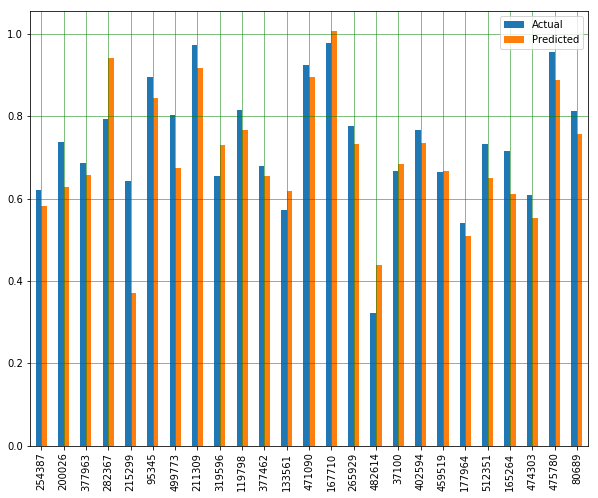

In [17]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

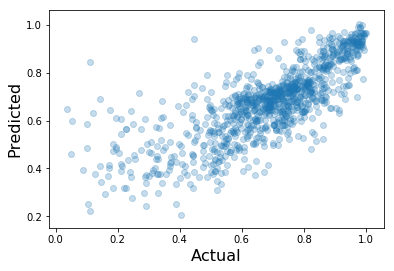

In [18]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

Statistics

In [19]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

r Squared: 0.6151588554492917


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 0.08879377356514451
Mean Squared Error: 0.015720309235316893


In [21]:
metrics_df = pd.read_csv("data\metrics_df.csv")
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "Neural Network"}, ignore_index=True)

In [22]:
metrics_df.tail()

,Input,R Squared,Mean Absolute Error,Mean Squared Error,Model
33,"['specialty_description', 'nppes_provider_city...",0.256006,0.132379,0.030284,Lasso Linear
34,"['specialty_description', 'nppes_provider_city...",0.225165,0.136907,0.031615,Lasso Linear
35,"['specialty_description', 'nppes_provider_city...",0.582957,0.091493,0.016986,Random Forest
36,"['specialty_description', 'nppes_provider_city...",0.570916,0.095623,0.017558,Neural Network
37,"[specialty_description, nppes_provider_city, t...",0.615159,0.088794,0.015720,Neural Network


In [23]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save the Trained Model

In [24]:
dump(MLPR, "Model_Weights\\NNet\\NNet_trainedModel") 

['Model_Weights\\NN\\NN_trainedModel']